In [22]:
# 필요한 라이브러리 설치
!pip install ucimlrepo scikit-learn xgboost matplotlib seaborn

Features (X) shape: (208, 60)
Target (y) shape: (208, 1)
Feature names: Index(['Attribute1', 'Attribute2', 'Attribute3', 'Attribute4', 'Attribute5',
       'Attribute6', 'Attribute7', 'Attribute8', 'Attribute9', 'Attribute10',
       'Attribute11', 'Attribute12', 'Attribute13', 'Attribute14',
       'Attribute15', 'Attribute16', 'Attribute17', 'Attribute18',
       'Attribute19', 'Attribute20', 'Attribute21', 'Attribute22',
       'Attribute23', 'Attribute24', 'Attribute25', 'Attribute26',
       'Attribute27', 'Attribute28', 'Attribute29', 'Attribute30',
       'Attribute31', 'Attribute32', 'Attribute33', 'Attribute34',
       'Attribute35', 'Attribute36', 'Attribute37', 'Attribute38',
       'Attribute39', 'Attribute40', 'Attribute41', 'Attribute42',
       'Attribute43', 'Attribute44', 'Attribute45', 'Attribute46',
       'Attribute47', 'Attribute48', 'Attribute49', 'Attribute50',
       'Attribute51', 'Attribute52', 'Attribute53', 'Attribute54',
       'Attribute55', 'Attribute56',

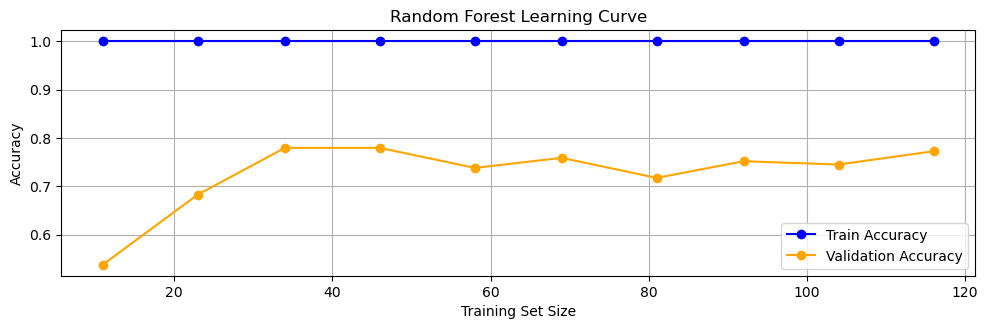

In [15]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

# 데이터 로드
data = fetch_ucirepo(id=151)
X = data.data.features
y = data.data.targets

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"Feature names: {X.columns}")
print(f"Target values: {np.unique(y)}")
# 데이터 208개
# 특징 60개씩
# M: Mines
# R: Rocks

# 문자열 레이블을 숫자로 변환 (차원 변환 포함)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y.values.ravel())

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(
    n_estimators=215,   # 트리 개수
    #max_depth=15,   # 트리 깊이 제한
    #min_samples_split=10,   # 분할 최소 샘플 개수
    #min_samples_leaf=5,   # 리프 노드 최소 샘플 개수
    #max_features='sqrt',   # 각 트리가 사용할 특성 개수
    random_state=42,
)
rf_model.fit(X_train, y_train)

# 훈련 정확도 및 검증 정확도 계산
train_accuracy = rf_model.score(X_train, y_train)
test_accuracy = rf_model.score(X_test, y_test)

print(f"훈련 정확도: {train_accuracy * 100:.2f}%")
print(f"검증 정확도: {test_accuracy * 100:.2f}%")

# 학습 곡선 시각화
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train,
    cv=5,   # 교차 검증 폴드 개수
    train_sizes=np.linspace(0.1, 1.0, 10),   # 훈련 데이터 크기 비율 (%에서, %까지, 단계로 학습)
    scoring='accuracy'
)

# 평균 학습 정확도
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# 그래프 시각화
plt.figure(figsize=(10, 6))

# 학습 정확도, 검증 정확도 그래프
plt.subplot(2, 1, 1)
plt.plot(train_sizes, train_mean, label='Train Accuracy', marker='o', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Accuracy', marker='o', color='orange')
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.grid()

plt.tight_layout()
plt.show()